<a href="https://colab.research.google.com/github/arlygnwn/Python/blob/main/Tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [20]:
ls   

 CNN/  'Copy of scenes_nn_4 layers.ipynb'   NN/   Tugas10.ipynb   Tugas11.ipynb


In [21]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [22]:

# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("CNN")
data = []
labels = []

[INFO] loading images...


In [23]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32X32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((32, 32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [29]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [30]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [31]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [32]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 32, 32, 3)
(149, 32, 32, 3)


In [147]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 256)             

In [151]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [152]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=38, batch_size=42)

Epoch 1/38
11/11 [==============================] - 1s 64ms/step - loss: 1.5958 - accuracy: 0.2387 - val_loss: 1.5481 - val_accuracy: 0.3356
Epoch 2/38
11/11 [==============================] - 1s 54ms/step - loss: 1.4847 - accuracy: 0.4009 - val_loss: 1.3992 - val_accuracy: 0.4027
Epoch 3/38
11/11 [==============================] - 1s 54ms/step - loss: 1.3036 - accuracy: 0.4775 - val_loss: 1.2583 - val_accuracy: 0.4497
Epoch 4/38
11/11 [==============================] - 1s 54ms/step - loss: 1.1435 - accuracy: 0.5608 - val_loss: 1.2242 - val_accuracy: 0.4564
Epoch 5/38
11/11 [==============================] - 1s 55ms/step - loss: 1.0482 - accuracy: 0.5743 - val_loss: 1.0973 - val_accuracy: 0.5369
Epoch 6/38
11/11 [==============================] - 1s 54ms/step - loss: 0.9935 - accuracy: 0.5946 - val_loss: 1.0549 - val_accuracy: 0.5168
Epoch 7/38
11/11 [==============================] - 1s 53ms/step - loss: 0.9393 - accuracy: 0.6126 - val_loss: 1.0513 - val_accuracy: 0.5839
Epoch 8/38
11

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


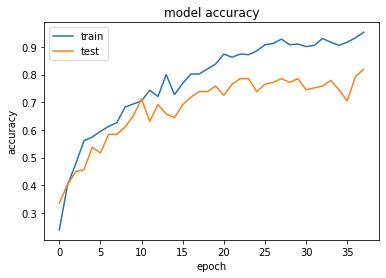

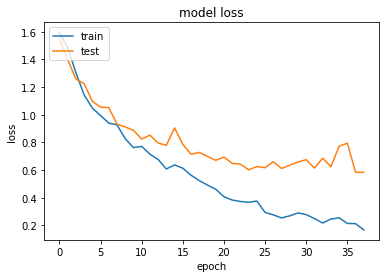

In [153]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [155]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=42)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.78      0.78      0.78        32
      GMB_03       0.84      0.84      0.84        25
      GMB_06       0.81      0.74      0.78        35
      GMB_09       0.95      0.87      0.91        23
      GMB_11       0.77      0.88      0.82        34

    accuracy                           0.82       149
   macro avg       0.83      0.82      0.83       149
weighted avg       0.82      0.82      0.82       149

